In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add latitude and longitude to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitiude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)


598

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Import the datetime module fromt eh datetime library
from datetime import datetime

In [8]:
# starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print('Beginning Data Retrieval    ')
print('----------------------------')

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set the numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}|{city}")
    
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # parse the JSON and retrive the data
        city_weather = requests.get(city_url).json()
        # parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
# if an error is experienced, skip the city
    except:
        print('City not found. Skipping...')
        pass
    
# Indicate the data loading is complete
print("---------")
print("Data retrieval complete   ")
print("-----------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1|ushuaia
Processing Record 2 of Set 1|san cristobal
Processing Record 3 of Set 1|kedrovyy
Processing Record 4 of Set 1|ciudad bolivar
Processing Record 5 of Set 1|clarence town
Processing Record 6 of Set 1|mahebourg
Processing Record 7 of Set 1|siguiri
Processing Record 8 of Set 1|taolanaro
City not found. Skipping...
Processing Record 9 of Set 1|toliary
City not found. Skipping...
Processing Record 10 of Set 1|camargo
Processing Record 11 of Set 1|riachao das neves
Processing Record 12 of Set 1|eusebio
Processing Record 13 of Set 1|mandiana
Processing Record 14 of Set 1|karaton
Processing Record 15 of Set 1|bredasdorp
Processing Record 16 of Set 1|port alfred
Processing Record 17 of Set 1|los llanos de aridane
Processing Record 18 of Set 1|dikson
Processing Record 19 of Set 1|esil
Processing Record 20 of Set 1|soskut
Processing Record 21 of Set 1|longyearbyen
Processing Record 22 of Set 1|saint-josep

Processing Record 42 of Set 4|berlevag
Processing Record 43 of Set 4|chuy
Processing Record 44 of Set 4|ostrovnoy
Processing Record 45 of Set 4|la trinite
Processing Record 46 of Set 4|baglung
Processing Record 47 of Set 4|brigantine
Processing Record 48 of Set 4|afmadu
City not found. Skipping...
Processing Record 49 of Set 4|wukari
Processing Record 50 of Set 4|pindiga
Processing Record 1 of Set 5|rundu
Processing Record 2 of Set 5|villazon
Processing Record 3 of Set 5|deer lake
Processing Record 4 of Set 5|rawson
Processing Record 5 of Set 5|luderitz
Processing Record 6 of Set 5|nikolayevskaya
Processing Record 7 of Set 5|usinsk
Processing Record 8 of Set 5|bugama
Processing Record 9 of Set 5|bonfim
Processing Record 10 of Set 5|touros
Processing Record 11 of Set 5|oeiras do para
Processing Record 12 of Set 5|korla
Processing Record 13 of Set 5|sao filipe
Processing Record 14 of Set 5|nikolskoye
Processing Record 15 of Set 5|lodwar
Processing Record 16 of Set 5|nizhnevartovsk
Proces

Processing Record 45 of Set 8|campbeltown
Processing Record 46 of Set 8|carbonear
Processing Record 47 of Set 8|san carlos de bariloche
Processing Record 48 of Set 8|melhus
Processing Record 49 of Set 8|ust-kulom
Processing Record 50 of Set 8|barra
Processing Record 1 of Set 9|nador
Processing Record 2 of Set 9|salta
Processing Record 3 of Set 9|kondagaon
Processing Record 4 of Set 9|cayenne
Processing Record 5 of Set 9|qaqortoq
Processing Record 6 of Set 9|kuminskiy
Processing Record 7 of Set 9|ayorou
Processing Record 8 of Set 9|manta
Processing Record 9 of Set 9|the valley
Processing Record 10 of Set 9|juba
Processing Record 11 of Set 9|karaman
Processing Record 12 of Set 9|muravlenko
Processing Record 13 of Set 9|nazilli
Processing Record 14 of Set 9|louisbourg
City not found. Skipping...
Processing Record 15 of Set 9|salinopolis
Processing Record 16 of Set 9|vreed en hoop
City not found. Skipping...
Processing Record 17 of Set 9|pelym
Processing Record 18 of Set 9|cap malheureux
P

Processing Record 40 of Set 12|sulurpeta
City not found. Skipping...
Processing Record 41 of Set 12|gevrai
Processing Record 42 of Set 12|hun
Processing Record 43 of Set 12|puerto del rosario
Processing Record 44 of Set 12|lucapa
Processing Record 45 of Set 12|chatellerault
Processing Record 46 of Set 12|zemio
Processing Record 47 of Set 12|khokhryaki
Processing Record 48 of Set 12|visby
---------
Data retrieval complete   
-----------


In [10]:
len(city_data)

550

In [11]:
# Convert an array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,59.00,58,75,17.27,AR,2021-01-16 19:11:10
1,San Cristobal,7.7669,-72.2250,87.80,51,40,11.50,VE,2021-01-16 19:15:07
2,Kedrovyy,56.1667,91.8167,14.00,62,0,2.24,RU,2021-01-16 19:15:08
3,Ciudad Bolivar,8.1222,-63.5497,90.19,44,92,10.89,VE,2021-01-16 19:15:08
4,Clarence Town,-32.5833,151.7833,57.99,94,0,8.05,AU,2021-01-16 19:15:08
5,Mahebourg,-20.4081,57.7000,80.60,83,75,11.50,MU,2021-01-16 19:15:09
6,Siguiri,11.6667,-9.5000,79.18,15,100,3.33,GN,2021-01-16 19:15:10
7,Camargo,27.6667,-105.1667,68.88,21,0,9.66,MX,2021-01-16 19:15:10
8,Riachao Das Neves,-11.7461,-44.9100,82.67,65,100,1.70,BR,2021-01-16 19:12:36
9,Eusebio,-3.8900,-38.4506,86.00,66,20,16.11,BR,2021-01-16 19:11:26


In [12]:
# Reorder as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, 
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-01-16 19:11:10,-54.8000,-68.3000,59.00,58,75,17.27
1,San Cristobal,VE,2021-01-16 19:15:07,7.7669,-72.2250,87.80,51,40,11.50
2,Kedrovyy,RU,2021-01-16 19:15:08,56.1667,91.8167,14.00,62,0,2.24
3,Ciudad Bolivar,VE,2021-01-16 19:15:08,8.1222,-63.5497,90.19,44,92,10.89
4,Clarence Town,AU,2021-01-16 19:15:08,-32.5833,151.7833,57.99,94,0,8.05


In [13]:
# Create output csv file
output_csv_file = 'weather_data/cities.csv'

# Export the city data into a csv
city_data_df.to_csv(output_csv_file, index_label='City_ID')

In [14]:
# Extract relevant fields from DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

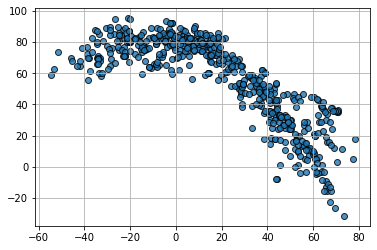

In [15]:
# Import time module
import time
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='cities')

# Incorporate the graph properties
plt.title = (f"City Latitude vs Max Temperature " + time.strftime('%x'))
plt.xlabel = 'Latitude'
plt.ylabel = 'Max Temperature (F)'
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# show the plot
plt.show()

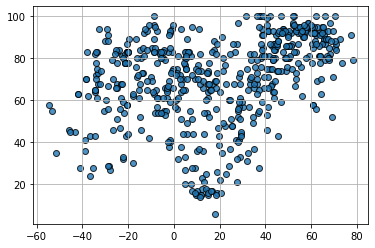

In [18]:
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='cities')

# Incorporate the graph properties
plt.title = (f"City Latitude vs Humidity " + time.strftime('%x'))
plt.xlabel = 'Latitude'
plt.ylabel = '% Humidity'
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# show the plot
plt.show()

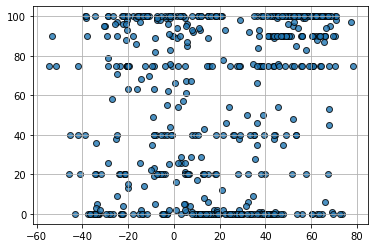

In [19]:
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='cities')

# Incorporate the graph properties
plt.title = (f"City Latitude vs Cloudiness " + time.strftime('%x'))
plt.xlabel = 'Latitude'
plt.ylabel = 'Cloudiness (%)'
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# show the plot
plt.show()

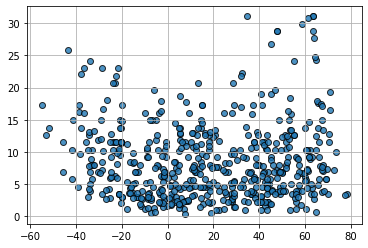

In [21]:
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='cities')

# Incorporate the graph properties
plt.title = (f"City Latitude vs Wind Speed " + time.strftime('%x'))
plt.xlabel = 'Latitude'
plt.ylabel = 'Wind Speed (mph)'
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# show the plot
plt.show()